# Muesli Distribution

Create a notebook that is solving following questions:

1. Filter muesli order data for one month
2. Using sns.displot() plot the distribution of the quantity during that month (Try setting the parameter kde=True). More info on this plotting function here: displot
3. Filter muesli order data for the year 2017 and Los Angeles city
4. Again using sns.displot() plot the distribution of the discount for the Los Angeles and year 2017.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm

In [3]:
df_orders = pd.read_csv('../data/muesli_orders.csv', index_col=0, header=1)

In [4]:
df_orders.columns = df_orders.columns.str.lower()

df_orders.rename(columns={'order id':'order_id',
                          'order date':'order_date',
                          'ship mode' : 'ship_mode',
                          'customer id' : 'customer_id',
                          'customer name' : 'customer_name',
                          'origin channel' : 'origin_channel',
                          'postal code' : 'postal_code',
                          'sub-category' : 'sub_category', 
                          'product id' : 'product_id'
                         },inplace=True)

df_orders.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_id', 'customer_name',
       'origin_channel', 'country/region', 'city', 'state', 'postal_code',
       'region', 'category', 'sub_category', 'product_id', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [6]:
df_orders.drop_duplicates(inplace=True)

In [7]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], dayfirst = True)

df_orders.dtypes

order_id                  object
order_date        datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
origin_channel            object
country/region            object
city                      object
state                     object
postal_code              float64
region                    object
category                  object
sub_category              object
product_id                object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
dtype: object

In [9]:
df_orders['year'] = df_orders['order_date'].dt.year
df_orders['month'] = df_orders['order_date'].dt.month
df_orders['day'] = df_orders['order_date'].dt.day_name()

df_orders.head()

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,category,sub_category,product_id,sales,quantity,discount,profit,year,month,day
Index,,,,,,,,,,,,,,,,,,,,,
27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741,2019,1,Wednesday
45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714,2019,3,Monday
48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500,2019,6,Thursday
60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.0,3.3000,2019,6,Monday
63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.0,6.1512,2018,11,Saturday


In [10]:
bin_labels = ['Q1', 'Q2', 'Q3', 'Q4']

bin_boundaries = [0,3,6,9,12]

df_orders['quarter'] = pd.cut(df_orders['month'], bins = bin_boundaries, labels = bin_labels)

df_orders

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,sub_category,product_id,sales,quantity,discount,profit,year,month,day,quarter
Index,,,,,,,,,,,,,,,,,,,,,
27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741,2019,1,Wednesday,Q1
45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714,2019,3,Monday,Q1
48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500,2019,6,Thursday,Q2
60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,...,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000,2019,6,Monday,Q2
63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,...,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512,2018,11,Saturday,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,US-2019-115441,2019-07-25,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,...,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544,2019,7,Thursday,Q3
9908,US-2018-129007,2018-09-13,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,...,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720,2018,9,Thursday,Q3
9913,CA-2018-132388,2018-10-10,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,...,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204,2018,10,Wednesday,Q4


In [19]:
## 1. Filter muesli order data for one month

sept_2018 = df_orders[(df_orders['year']==2018)&(df_orders['month']==9)]
sept_2018.describe()

,postal_code,sales,quantity,discount,profit,year,month
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.0
mean,47108.924915,220.463884,3.706485,0.140956,28.017620,2018.0,9.0
std,34719.079089,439.854688,2.300058,0.218835,143.862783,0.0,0.0
min,1841.000000,1.080000,1.000000,0.000000,-1665.052200,2018.0,9.0
25%,11572.000000,16.270000,2.000000,0.000000,1.576000,2018.0,9.0
50%,36608.000000,60.740000,3.000000,0.000000,9.619200,2018.0,9.0
75%,87505.000000,199.764000,5.000000,0.200000,31.285800,2018.0,9.0
max,98198.000000,4228.704000,14.000000,0.800000,561.564000,2018.0,9.0


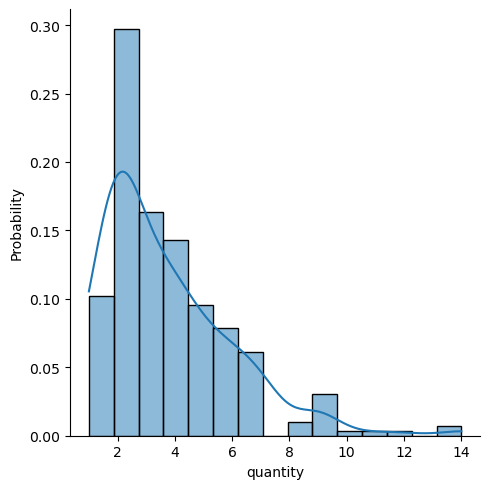

In [20]:
# 2. Using sns.displot() plot the distribution of the quantity during that month 
#(Try setting the parameter kde=True). More info on this plotting function here: displot


sns.displot(sept_2018['quantity'], kde=True, stat = 'probability');

In [18]:
# 3. Filter muesli order data for the year 2017 and Los Angeles city

LA_2017 = df_orders[(df_orders['year']==2017)&(df_orders['city']=='Los Angeles')]
LA_2017.head()

,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,sub_category,product_id,sales,quantity,discount,profit,year,month,day,quarter
Index,,,,,,,,,,,,,,,,,,,,,
187,CA-2017-123260,2017-08-26,Standard Class,FM-14290,Frank Merwin,Facebook,United States,Los Angeles,California,90032.0,...,Gluten Free,TEC-AC-10002323,176.80,8,0.0,22.9840,2017,8,Saturday,Q3
1573,US-2017-157385,2017-11-23,First Class,SC-20095,Sanjit Chand,Email,United States,Los Angeles,California,90004.0,...,Gluten Free,TEC-AC-10003280,29.99,1,0.0,6.2979,2017,11,Thursday,Q4
2067,CA-2017-106439,2017-10-31,Standard Class,GG-14650,Greg Guthrie,Sales,United States,Los Angeles,California,90049.0,...,Gluten Free,TEC-AC-10004568,251.91,9,0.0,47.8629,2017,10,Tuesday,Q4
3131,CA-2017-136399,2017-12-16,First Class,CC-12100,Chad Cunningham,Facebook,United States,Los Angeles,California,90049.0,...,Gluten Free,TEC-AC-10001142,395.00,5,0.0,39.5000,2017,12,Saturday,Q4
4245,CA-2017-138436,2017-03-26,Standard Class,JD-15895,Jonathan Doherty,Sales,United States,Los Angeles,California,90036.0,...,Gluten Free,TEC-AC-10002323,66.30,3,0.0,8.6190,2017,3,Sunday,Q1


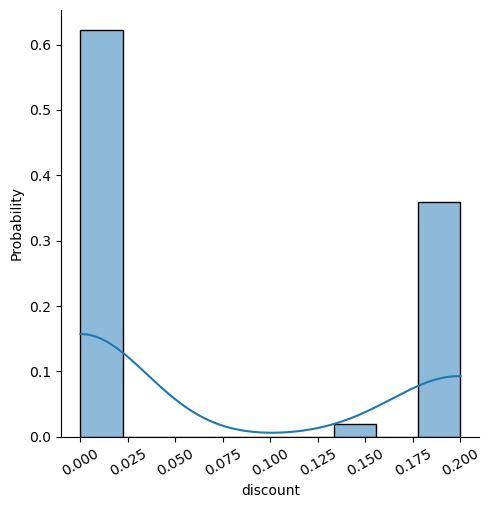

In [24]:
# 4. Again using sns.displot() plot the distribution of the discount for the Los Angeles and year 2017.

sns.displot(LA_2017['discount'], kde=True, stat = 'probability');
plt.xticks(rotation=30);